In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Import pytorch https://pytorch.org/docs/stable/index.html
import torch
# Import numpy https://docs.scipy.org/doc/numpy/dev/
import numpy as np
from random import sample
# Import Variable https://jhui.github.io/2018/02/09/PyTorch-Variables-functionals-and-Autograd/
from torch.autograd import Variable


In [2]:

import time
import math


# Util function to keep track of execution time
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


In [3]:
print(torch.__version__)

1.0.0


### Download name data

In [4]:
import common.workshop

common.workshop.download_name_generation()

File names/names is already downloaded.


In [5]:
!ls ./

charrnn_pytorch.ipynb	    __pycache__
common			    tag-prediction
data			    TagsPrediction.ipynb
lost+found		    text-generation
MNIST-classification.ipynb  TextGeneration.ipynb
names			    text_generation_pytorch.ipynb


In [6]:

DATA_FILE = './names/names'


### Read data from files

In [7]:

# TODO: Implement

def read_names(filepath):
    names = []
    with open(DATA_FILE) as f:
        names = f.read().split('\n')[:-1]
    return names



In [8]:

names = read_names(DATA_FILE)

print(names[0:10])

assert(len(names) == 7944)


['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale']


### Data exploration(names)

### Explain overall approach

### Construct alphabet

In [9]:
pad_token = '#'


# TODO: Implement

def construct_alphabet(names, pad_token):
    alphabet = set()
    for name in names:
        for token in name:
            alphabet.add(token)
    alphabet.add(pad_token)
    return alphabet




In [10]:

alphabet = construct_alphabet(names, pad_token)

print(alphabet)


{'c', 'I', 'd', 'b', 'W', 'V', 'a', 'H', 'Z', 't', 'Y', 'G', 'J', 'l', 'D', 'j', 'C', 'A', 'n', 'f', 'Q', 'P', 'q', 'i', 'x', 'g', 'e', 'X', 'T', 'F', 'E', 'v', 'O', 'M', 'r', 'R', 'U', 'm', 'o', 'p', "'", 'y', 's', 'k', '-', 'h', 'B', 'K', 'L', 'N', '#', 'S', ' ', 'w', 'z', 'u'}


### Construct data dictionaries

In [13]:


# TODO: implement

def construct_data_dictionaries(alphabet):
    tokens_ids = {}
    ids_tokens = {}
    for ind,token in enumerate(alphabet):
        tokens_ids[token] = ind
        ids_tokens[ind] = token
    return tokens_ids, ids_tokens


In [14]:

tokens_ids, ids_tokens = construct_data_dictionaries(alphabet)


assert(len(tokens_ids) == len(ids_tokens))

print(tokens_ids)


{'c': 0, 'I': 1, 'd': 2, 'b': 3, 'W': 4, 'V': 5, 'a': 6, 'H': 7, 'Z': 8, 't': 9, 'Y': 10, 'G': 11, 'J': 12, 'l': 13, 'D': 14, 'j': 15, 'C': 16, 'A': 17, 'n': 18, 'f': 19, 'Q': 20, 'P': 21, 'q': 22, 'i': 23, 'x': 24, 'g': 25, 'e': 26, 'X': 27, 'T': 28, 'F': 29, 'E': 30, 'v': 31, 'O': 32, 'M': 33, 'r': 34, 'R': 35, 'U': 36, 'm': 37, 'o': 38, 'p': 39, "'": 40, 'y': 41, 's': 42, 'k': 43, '-': 44, 'h': 45, 'B': 46, 'K': 47, 'L': 48, 'N': 49, '#': 50, 'S': 51, ' ': 52, 'w': 53, 'z': 54, 'u': 55}


### Translate words into numbers

In [15]:
MAX_VECTOR_LEN = 15


# Implement

def to_nums(name):
    return [tokens_ids[ch] for ch in name]

def to_word(ids):
    return ''.join([ids_tokens[id] for id in ids])

def to_pad(nums):
    pad_arr = [tokens_ids[pad_token] for _ in range(MAX_VECTOR_LEN-len(nums))]
    return nums + pad_arr


def name_to_vector(name):
    return to_pad(to_nums(name))


In [16]:


assert(len(name_to_vector("text")) == 15)

print(name_to_vector("text"))


[9, 26, 24, 9, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]


### Get random smaple

In [17]:

def sample_names(batch_size=32):
    return sample(names, batch_size)


In [18]:

sample_names(10)


['Benji',
 'Venita',
 'Audrey',
 'Alpa',
 'Beverlee',
 'Nevin',
 'Sharleen',
 'Andrea',
 'Daisie',
 'Indira']

### Names to padded matrix

In [19]:

def names_to_pad_matrix(names):
    return np.array([to_pad(to_nums(name)) for name in names])



In [20]:

names_to_pad_matrix(sample_names(10))


array([[11, 23, 18, 26, 31, 34,  6, 50, 50, 50, 50, 50, 50, 50, 50],
       [11, 23, 19, 19, 26, 34, 50, 50, 50, 50, 50, 50, 50, 50, 50],
       [28, 45, 38, 34, 18, 41, 50, 50, 50, 50, 50, 50, 50, 50, 50],
       [46, 26, 34, 18,  6, 34,  2, 38, 50, 50, 50, 50, 50, 50, 50],
       [49, 38, 18,  6, 45, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50],
       [11, 26, 34, 34,  6, 34,  2, 50, 50, 50, 50, 50, 50, 50, 50],
       [14,  6, 34,  0, 23, 26, 50, 50, 50, 50, 50, 50, 50, 50, 50],
       [ 7,  6, 39, 39, 41, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50],
       [48,  6, 55, 34, 23, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50],
       [14, 38, 34, 34, 41, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]])

### Intro to RNNs

### Build simple RNN using pytorch

In [21]:

import torch.nn as nn

class SimpleRNN(torch.nn.Module):
    def __init__(self, n_input, n_hidden, n_output):
        super(SimpleRNN, self).__init__()
        self.n_hidden = n_hidden
        self.i2h = nn.Linear(n_input + n_hidden, n_hidden)
        self.h2o = nn.Linear(n_hidden, n_output)
        self.softmax = nn.LogSoftmax(dim=1)
#         self.softmax = nn.Softmax(dim=1)
        self.relu = nn.ReLU()
        

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        next_hidden = self.i2h(combined)
        next_hidden = self.relu(next_hidden)
        output = self.h2o(next_hidden)
        return next_hidden, self.softmax(output)
    
    def initHidden(self):
        return torch.zeros(1, self.n_hidden)



In [22]:

t1 = torch.zeros(3,2,10)
t2 = torch.zeros(3,2,20)

torch.cat((t1,t2),2).shape


torch.Size([3, 2, 30])

### Convert name to matrix

In [23]:


n_letters = len(alphabet)

# Implement

def to_matrix(line):
    matrix = np.zeros((len(line), n_letters))
    for li in range(len(line)):
        letter = line[li]
        matrix[li][tokens_ids[letter]] = 1
    return matrix




In [24]:

assert(to_matrix('test').shape == (4, n_letters))


In [25]:


def get_input_matrix(line):
    return to_matrix(line)

def get_target_vector(line):
    letter_indexes = [tokens_ids[letter] for letter in line[1:]]
    letter_indexes.append(tokens_ids[pad_token]) # EOS
    return np.array(letter_indexes)


In [26]:


input_line = 'testline'

input_matrix = get_input_matrix(input_line)

target_vector = get_target_vector(input_line)


print(target_vector)



[26 42  9 13 23 18 26 50]


In [27]:


def numpy_to_tensor(numpy_matrix):
    return torch.from_numpy(numpy_matrix)



In [30]:

def construct_input_tensor(line):
    input_matrix = get_input_matrix(line)
    input_tensor = numpy_to_tensor(input_matrix)
    input_tensor = input_tensor.unsqueeze(dim = 1)
    input_tensor = input_tensor.type(torch.FloatTensor)
    return input_tensor

def construct_output_tensor(line):
    output_vector = get_target_vector(line)
    output_tensor = numpy_to_tensor(output_vector)
    output_tensor = output_tensor.type(torch.LongTensor)
    return output_tensor
    
def random_sample():
    name = sample_names(1)[0]
    i_tensor = construct_input_tensor(name)
    o_tensor = construct_output_tensor(name)
    
    return i_tensor, o_tensor
    


In [31]:

rnn = SimpleRNN(n_letters, 128, n_letters)

hidden = rnn.initHidden()

input_tensor, output_tensor = random_sample()

next_hidden, output = rnn(input_tensor[0], hidden)

print(next_hidden.shape)


torch.Size([1, 128])


### Create criterion

In [32]:

def construct_criterion():
    return nn.CrossEntropyLoss()


In [33]:


criterion = construct_criterion()

input_tensor, target_tensor = random_sample()

# 
target_tensor = target_tensor.unsqueeze_(-1)

next_hidden, output_layer = rnn(input_tensor[0], rnn.initHidden())

criterion(output_layer, target_tensor[0])



tensor(3.9768, grad_fn=<NllLossBackward>)

### Train loop

In [34]:
# criterion = nn.NLLLoss()
criterion = nn.CrossEntropyLoss()
rnn = SimpleRNN(n_letters, 128, n_letters)
learning_rate = 0.005

def train_on_random_sample():
    input_tensor, target_tensor = random_sample()
    target_tensor = target_tensor.unsqueeze_(-1)
    hidden = rnn.initHidden()
    nletters = input_tensor.size(0)

    rnn.zero_grad()
    loss = 0
    
    for i in range(nletters):
        next_hidden, output = rnn(input_tensor[i], hidden)
        l = criterion(output, target_tensor[i])
        hidden = next_hidden
        loss+=l
        
    loss.backward()
    
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)
    
    return output, loss.item()


In [35]:

n_iters = 100000
print_every = 5000
plot_every = 500
all_losses = []
total_loss = 0 # Reset every plot_every iters

start = time.time()

for ind in range(1, n_iters + 1):
    output, loss = train_on_random_sample()
    total_loss += loss

    if ind % print_every == 0:
        print('%s (%d %d%%) %.4f' % (timeSince(start), ind, ind / n_iters * 100, loss))

    if ind % plot_every == 0:
        all_losses.append(total_loss / plot_every)
        total_loss = 0



0m 11s (5000 5%) 9.9013
0m 22s (10000 10%) 13.7898
0m 34s (15000 15%) 15.3389
0m 45s (20000 20%) 8.4625
0m 57s (25000 25%) 8.8541
1m 8s (30000 30%) 11.3351
1m 22s (35000 35%) 10.8521
1m 33s (40000 40%) 8.6659
1m 45s (45000 45%) 10.0635
1m 58s (50000 50%) 7.1660
2m 13s (55000 55%) 11.3921
2m 28s (60000 60%) 19.2101
2m 42s (65000 65%) 6.3835
2m 56s (70000 70%) 12.0848
3m 11s (75000 75%) 10.5352
3m 25s (80000 80%) 9.4920
3m 40s (85000 85%) 6.5018
3m 54s (90000 90%) 10.2576
4m 6s (95000 95%) 9.2764
4m 18s (100000 100%) 5.6780


### Plot loss

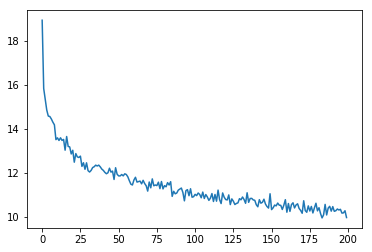

In [36]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)


In [38]:

max_length = 15
def sample_from_nn(start_letter='A'):
    with torch.no_grad():  # no need to track history in sampling
        input = construct_input_tensor(start_letter)
        hidden = rnn.initHidden()

        output_name = start_letter

        for i in range(max_length):
            hidden, output = rnn(input[0], hidden)
            topv, topi = output.topk(1)
            topi = topi[0][0]
            if topi == n_letters - 1:
                break
            else:
                letter = ids_tokens[topi.item()]
                output_name += letter
            input = construct_input_tensor(letter)

        return output_name
    
    
def sample_from_nn_distr(start_letter='A'):
    with torch.no_grad():  # no need to track history in sampling
        input = inputTensor(start_letter)
        hidden = rnn.initHidden()

        output_name = start_letter

        for i in range(max_length):
            hidden, output = rnn(input[0], hidden)
            output_arr = output.numpy()[0]
            print(output_arr)
            token_id = np.random.choice(range(len(output_arr)), p = output_arr)
            letter = ids_tokens[token_id]
            output_name += letter    
            input = inputTensor(letter)

        return output_name



In [56]:

sample_from_nn('F')

'Franc#is#a######'